MNIST, построение полносвязной н.сети

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from tqdm.notebook import tqdm

%matplotlib inline

In [ ]:
mnist_train = torchvision.datasets.MNIST(
    "./mnist/", train=True, download=True, transform=torchvision.transforms.ToTensor()
)  # используем готовый класс от торча для загрузки данных для тренировки

mnist_val = torchvision.datasets.MNIST(
    "./mnist/", train=False, download=True, transform=torchvision.transforms.ToTensor()
)  # используем готовый класс от торча для загрузки данных для валидации

train_dataloader = torch.utils.data.DataLoader(
    mnist_train, batch_size=4, shuffle=True, num_workers=1
)  # так как это уже унаследованный от Dataset класс, его можно сразу пихать в даталоадер

val_dataloader = torch.utils.data.DataLoader(
    mnist_val, batch_size=4, shuffle=True, num_workers=1
)  # так как это уже унаследованный от Dataset класс, его можно сразу пихать в даталоадер

100%|██████████| 9912422/9912422 [00:00<00:00, 92169467.53it/s]


Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 64025208.15it/s]

Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 28272325.29it/s]


Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5159948.20it/s]

Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



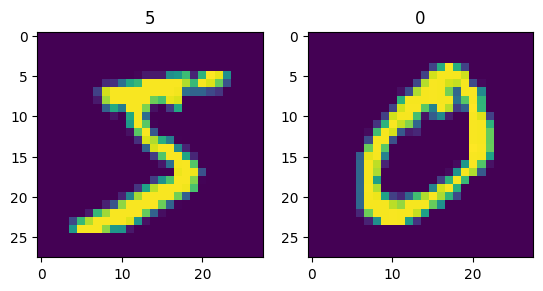

In [ ]:
for i in [0, 1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(mnist_train[i][0].squeeze(0).numpy().reshape([28, 28]))
    plt.title(str(mnist_train[i][1]))
plt.show()

In [ ]:
model = nn.Sequential(
    nn.Flatten(),            # превращаем картинку 28х28 в вектор размером 784
    nn.Linear(784, 128),     # входной слой размером 784 нейронов с выходом в 128 нейронов
    nn.ReLU(),               # функция активации релу
    nn.Linear(128, 10),      # функция активации релу
    nn.Softmax(dim=-1),      # софтмакс для получения вероятностного распределения над метками класса
)

optimizer = torch.optim.SGD(
    model.parameters(), lr=0.05
)                            # создаем оптимизатор и передаем туда параметры модели

In [ ]:
#[x for x in model.named_parameters()]                 #так выглядят параметры

In [ ]:
for epoch in range(11):                                # всего у нас будет 10 эпох (10 раз подряд пройдемся по всем батчам из трейна)
    for x_train, y_train in tqdm(train_dataloader):    # берем батч из трейн лоадера
        y_pred = model(x_train)                        # делаем предсказания
        loss = nn.CrossEntropyLoss()(y_pred, y_train)  # считаем лосс
        loss.backward()                                # считаем градиенты обратным проходом
        optimizer.step()                               # обновляем параметры сети
        optimizer.zero_grad()                          # обнуляем посчитанные градиенты параметров

    if epoch % 2 == 0:
        mean_val_loss = []                             # сюда будем складывать средний лосс по батчам
        val_accuracy = []
        with torch.no_grad():                          # мы считаем качество, поэтому запрещаем фреймворку считать градиенты по параметрам
            for x_val, y_val in tqdm(val_dataloader):  # берем батч из вал лоадера
                y_pred = model(x_val)                  # делаем предсказания
                loss = nn.CrossEntropyLoss()(y_pred, y_val)  # считаем лосс
                mean_val_loss.append(loss.numpy())     # добавляем в массив
                val_accuracy.extend( (torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist() )
        print( "Epoch: {epoch}, loss: {loss}, accuracy: {accuracy}".format(epoch=epoch, loss=np.mean(mean_val_loss), accuracy=np.mean(val_accuracy)) )
                                                       # выводим статистику

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 0, loss: 1.6247260570526123, accuracy: 0.8413


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 2, loss: 1.597934603691101, accuracy: 0.8645


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 4, loss: 1.5875723361968994, accuracy: 0.8741


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 6, loss: 1.4980190992355347, accuracy: 0.9658


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 8, loss: 1.4929046630859375, accuracy: 0.9701


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 10, loss: 1.489614725112915, accuracy: 0.9744


CIFAR-10, распознование символов на изображениях. Сверточная н. сеть

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose([
        transforms.ToTensor(),                                      # Преобразуем изображние в тензор
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])                                                              # Нормализуем тензор изображения по каждому каналу

In [ ]:
trainset = torchvision.datasets.CIFAR10(
    root="./data", train=True, download=True, transform=transform
)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=4, shuffle=True, num_workers=2
)

testset = torchvision.datasets.CIFAR10(
    root="./data", train=False, download=True, transform=transform
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=4, shuffle=False, num_workers=2
)

classes = ( "plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck" )

Files already downloaded and verified
Files already downloaded and verified


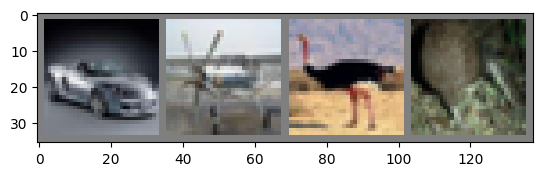

  car plane  bird  bird


In [ ]:
def imshow(img):
    img = img / 2 + 0.5 # Убираем нормализацию
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Получаем изображения и их метки классов
dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(" ".join("%5s" % classes[labels[j]] for j in range(4)))

In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 64, 5)
        self.fc1 = nn.Linear(64*5*5, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64*5*5)                 # Растягиваем данные из тензора в вектор
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = SimpleCNN()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()                   # Зануляем градиенты
        outputs = model(inputs)                 # Получаем предсказание модели
        loss = criterion(outputs, labels)       # Считаем loss
        loss.backward()                         # Считаем градиенты
        optimizer.step()                        # Обновляем параметры модели

        # Печатаем статистику обучения
        running_loss += loss.item()
        if i % 2000 == 1999:
            print("[%d, %5d] loss: %.3f" % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print("Обучение завершено")

[1,  2000] loss: 1.845
[1,  4000] loss: 1.565
[1,  6000] loss: 1.460
[1,  8000] loss: 1.401
[1, 10000] loss: 1.341
[1, 12000] loss: 1.258
[2,  2000] loss: 1.173
[2,  4000] loss: 1.174
[2,  6000] loss: 1.168
[2,  8000] loss: 1.125
[2, 10000] loss: 1.086
[2, 12000] loss: 1.076
Обучение завершено


In [ ]:
correct = 0
total = 0

with torch.no_grad():                            # Отключает расчет градиентов
    for data in testloader:
        images, labels = data
        outputs = model(images)                  # Получаем предсказание модели
        _, predicted = torch.max(
            outputs.data, 1
        )                                        # Возвращает индекс класса с максимальным значением
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print("Доля верных ответов на тестовых данных: %d %%" % (100 * correct / total))

Доля верных ответов на тестовых данных: 61 %
